# Crime Data Analysis

- Your analysis here
  
---

In [28]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib

# File to Load (Remember to Change These)
data_2010_2019 = Path("Crime_Data_from_2010_to_2019 (1).csv")
data_2020_2023 = Path("Crime_Data_from_2020_to_Present_20231016.csv")

# Read data(2010-2019) and data (2020- present)Data File and store into Pandas DataFrames
pre_covid_data = pd.read_csv(data_2010_2019)
post_covid_data = pd.read_csv(data_2020_2023)
#pre_covid_data.head(5)
#post_covid_data.head(5)

# Combine the data into a single dataset.  
Data_complete = pd.concat([pre_covid_data, post_covid_data], ignore_index=True)
Data_complete.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'version https://git-lfs.github.com/spec/v1'],
      dtype='object')

In [21]:
Data_complete.head()

,DR Number,Date Rptd,DATE OCC,TIME OCC,AREA,Area Name,Rpt Dist No,Part 1-2,Crime Code,Type of Crime,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,Latitude,Longitude,version https://git-lfs.github.com/spec/v1,Crime Location
0,1307355.0,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350.0,13.0,Newton,1385.0,2.0,900.0,VIOLATION OF COURT ORDER,...,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,NaN,RESIDENTIAL
3,90631215.0,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150.0,6.0,Hollywood,646.0,2.0,900.0,VIOLATION OF COURT ORDER,...,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,NaN,OUTDOORS
4,100100501.0,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100.0,1.0,Central,176.0,1.0,122.0,"RAPE, ATTEMPTED",...,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,NaN,OTHER
5,100100506.0,01/05/2010 12:00:00 AM,01/04/2010 12:00:00 AM,1650.0,1.0,Central,162.0,1.0,442.0,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,442.0,NaN,NaN,NaN,700 W 7TH ST,NaN,34.0480,-118.2577,NaN,OTHER
6,100100508.0,01/08/2010 12:00:00 AM,01/07/2010 12:00:00 AM,2005.0,1.0,Central,182.0,1.0,330.0,BURGLARY FROM VEHICLE,...,330.0,NaN,NaN,NaN,PICO BL,GRAND AV,34.0389,-118.2643,NaN,OUTDOORS


In [31]:
Data_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135622 entries, 0 to 2135621
Data columns (total 29 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   DR_NO                                       float64
 1   Date Rptd                                   object 
 2   DATE OCC                                    object 
 3   TIME OCC                                    float64
 4   AREA                                        float64
 5   AREA NAME                                   object 
 6   Rpt Dist No                                 float64
 7   Part 1-2                                    float64
 8   Crm Cd                                      float64
 9   Crm Cd Desc                                 object 
 10  Mocodes                                     object 
 11  Vict Age                                    float64
 12  Vict Sex                                    object 
 13  Vict Descent               

Data Analysis


In [32]:
len(Data_complete.columns)

29

In [29]:

Data_complete['Crime Year'] = pd.to_datetime(Data_complete['Date Rptd']).dt.year

Data_complete['Crime Year']

0          2010.0
1          2010.0
2          2010.0
3          2010.0
4          2010.0
            ...  
2135617       NaN
2135618       NaN
2135619       NaN
2135620       NaN
2135621       NaN
Name: Crime Year, Length: 2135622, dtype: float64

In [22]:
#Drop the columns not needed
Data_complete.drop(Data_complete.columns[[1, 2, 3, 4, 6, 7, 10, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,28]], axis=1, inplace=True)

# Now, you can access Data_complete without any issues



In [24]:

# Clean data for duplicate
Data_complete = Data_complete.drop_duplicates(subset=['DR_NO'])
# Clean data for -ve values

# Remove enteries with  Victim Sex : X and Victim Race: X, Removing 0 in VictAge

Data_complete = Data_complete[Data_complete['Vict Age'] > 0]

KeyError: Index(['DR_NO'], dtype='object')

In [18]:
Data_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1758649 entries, 0 to 2135614
Data columns (total 30 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   DR Number                                   float64
 1   Date Rptd                                   object 
 2   DATE OCC                                    object 
 3   TIME OCC                                    float64
 4   AREA                                        float64
 5   Area Name                                   object 
 6   Rpt Dist No                                 float64
 7   Part 1-2                                    float64
 8   Crime Code                                  float64
 9   Type of Crime                               object 
 10  Mocodes                                     object 
 11  Victim Age                                  float64
 12  Victim Gender                               object 
 13  Victim Ethnicity           

In [25]:
# Change the name of the columns
Data_complete.rename(columns={
                    'DR_NO':'DR Number',
                    'Crime Year': 'Crime Year',
                    'AREA NAME': 'Area Name',
                    'Crm Cd': 'Crime Code',
                    'Crm Cd Desc':'Type of Crime',
                    'Vict Age': 'Victim Age',
                    'Vict Sex': 'Victim Gender',
                    'Vict Descent': 'Victim Ethnicity',
                    'Premis Desc': 'Scene of Crime',
                    'LAT': 'Latitude',
                    'LON': 'Longitude'
                    
},inplace= True)

Data_complete.head()





,DR Number,Area Name,Crime Code,Type of Crime,Victim Age,Victim Gender,Victim Ethnicity,Scene of Crime,Latitude,Longitude,Crime Location
0,1307355.0,Newton,900.0,VIOLATION OF COURT ORDER,48.0,M,H,SINGLE FAMILY DWELLING,33.9825,-118.2695,RESIDENTIAL
3,90631215.0,Hollywood,900.0,VIOLATION OF COURT ORDER,47.0,F,W,STREET,34.1016,-118.3295,OUTDOORS
4,100100501.0,Central,122.0,"RAPE, ATTEMPTED",47.0,F,H,ALLEY,34.0387,-118.2488,OTHER
5,100100506.0,Central,442.0,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23.0,M,B,DEPARTMENT STORE,34.0480,-118.2577,OTHER
6,100100508.0,Central,330.0,BURGLARY FROM VEHICLE,46.0,M,H,STREET,34.0389,-118.2643,OUTDOORS


In [30]:
Data_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135622 entries, 0 to 2135621
Data columns (total 30 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   DR_NO                                       float64
 1   Date Rptd                                   object 
 2   DATE OCC                                    object 
 3   TIME OCC                                    float64
 4   AREA                                        float64
 5   AREA NAME                                   object 
 6   Rpt Dist No                                 float64
 7   Part 1-2                                    float64
 8   Crm Cd                                      float64
 9   Crm Cd Desc                                 object 
 10  Mocodes                                     object 
 11  Vict Age                                    float64
 12  Vict Sex                                    object 
 13  Vict Descent               

In [39]:
unique_demo = Data_complete["Victim Age"].value_counts()
print(unique_demo)



25.0     48350
26.0     47858
27.0     47308
28.0     46917
24.0     46870
         ...  
95.0       246
96.0       190
97.0       171
98.0       121
118.0        1
Name: Victim Age, Length: 99, dtype: int64


In [7]:
unique_demo = Data_complete["Victim Ethnicity"].value_counts()
print(unique_demo)

H    709249
W    470138
B    332768
O    165390
A     50308
X     15482
K      8634
F      2861
C      1197
I       962
J       459
P       354
V       254
Z       181
U       150
G        88
S        35
D        25
L        23
-         2
Name: Victim Ethnicity, dtype: int64


In [8]:
unique_demo = Data_complete["Area Name"].value_counts()
print(unique_demo)

77th Street    124029
Southwest      119862
Southeast       97971
N Hollywood     92428
Pacific         89847
Topanga         88094
Central         86985
Devonshire      84442
Van Nuys        83395
Mission         82457
Hollywood       80552
Northeast       79278
West LA         77410
Olympic         76774
Rampart         76297
Newton          76290
Wilshire        75744
West Valley     72821
Harbor          70777
Foothill        65764
Hollenbeck      57432
Name: Area Name, dtype: int64


## Crimes Summary

In [9]:
Total_crime_count = len(Data_complete['DR Number'])
Total_crime_count

1758649

In [43]:
#Plot a line graph showing the overall crimes trend change over the years
plot.line

NameError: name 'plot' is not defined

In [12]:
# Groups in Scene of Crime
unique_SOC = Data_complete["Scene of Crime"].value_counts()
print(unique_SOC)

SINGLE FAMILY DWELLING                          425723
STREET                                          312874
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    258746
PARKING LOT                                     114346
SIDEWALK                                        100816
                                                 ...  
MTA - SILVER LINE - LAC/USC MEDICAL CENTER           2
GREEN LINE (I-105 FWY LEVEL TRAIN)                   1
TACTICAL SIGNIFICANCE                                1
NUCLEAR FACILITY                                     1
REDLINE SUBWAY TUNNEL                                1
Name: Scene of Crime, Length: 320, dtype: int64


In [ ]:
# Calculate the kind of crimes (e.g different kind of crimes) per year??
#the distribution of crime types over the years
#clean_crime_data.loc(2017)
#df_2017= 
#df_2018
#df_2019
#df_2020
#df_2021
#df_2022
#crime_type



In [11]:

# Create a mapping of the bins
bin_mapping = {
    "SINGLE FAMILY DWELLING": "RESIDENTIAL",
    "MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)": "RESIDENTIAL",
    "PARKING LOT": "OUTDOORS",
    "STREET": "OUTDOORS",
    "SIDEWALK": "OUTDOORS"
}

# Create a new column "Crime Location" based on the mapping
Data_complete['Crime Location'] = Data_complete['Scene of Crime'].map(bin_mapping)

# Fill any remaining values with "OTHER"
Data_complete['Crime Location'].fillna("OTHER", inplace=True)

# Groups in Crime Location
unique_CL = Data_complete["Crime Location"].value_counts()
print(unique_CL)

# Use boolean indexing to filter the DataFrame
filtered_data = Data_complete[Data_complete['Crime Location'] == 'OTHER']

# Extract the values in the "Scene of Crime" column where "Crime Location" is "OTHER"
scene_of_crime_values = filtered_data['Scene of Crime']

# Print or use the values as needed
print(scene_of_crime_values)

RESIDENTIAL    684469
OTHER          546144
OUTDOORS       528036
Name: Crime Location, dtype: int64
4                     ALLEY
5          DEPARTMENT STORE
7             OTHER PREMISE
9             OTHER PREMISE
13                  LIBRARY
                 ...       
2135582      PUBLIC STORAGE
2135590     OTHER RESIDENCE
2135596      PUBLIC STORAGE
2135610     PARK/PLAYGROUND
2135614      GARAGE/CARPORT
Name: Scene of Crime, Length: 546144, dtype: object


In [ ]:
# Create a dataframe with crime_type and year????
crime_summary = pd.DataFrame({
    

## Area Summary

In [ ]:
#  select all of the different Areas


In [ ]:
# Divide areas into Central, Valley, South, West

In [ ]:
# Calculate the total crimes per area per year
per_area_crime_counts = 

In [31]:
#calculate crime types per area
# Five highest crimes 
print(Data_complete.columns)

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'version https://git-lfs.github.com/spec/v1', 'Crime Year'],
      dtype='object')


In [35]:
# Geoplot the area 
# Use the groupby and value_counts methods to count occurrences of "SINGLE FAMILY DWELLING" by "Crime_Year"
# Use the groupby and value_counts methods to count occurrences of "SINGLE FAMILY DWELLING" by "Crime Year"
frequency_by_year = Data_complete[Data_complete['Premis Desc'] == 'SINGLE FAMILY DWELLING'].groupby('Crime Year').size()

# Print the resulting Series 
print(frequency_by_year)

# Use the groupby and value_counts methods to count occurrences of "SINGLE FAMILY DWELLING" by "Crime Year"
frequency_by_year = Data_complete[Data_complete['Premis Desc'] == 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)'].groupby('Crime Year').size()

# Print the resulting Series "MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)"
print(frequency_by_year)

Crime Year
2010.0    43226
2011.0    43792
2012.0    43608
2013.0    41288
2014.0    34761
2015.0    40567
2016.0    42654
2017.0    43077
2018.0    43136
2019.0    41205
2020.0     2487
2021.0    10111
2022.0     2544
2023.0      825
dtype: int64
Crime Year
2010.0    25654
2011.0    25939
2012.0    27467
2013.0    26107
2014.0    21427
2015.0    26426
2016.0    26957
2017.0    27013
2018.0    26355
2019.0    24774
2020.0     1147
2021.0     6272
2022.0     1333
2023.0      542
dtype: int64


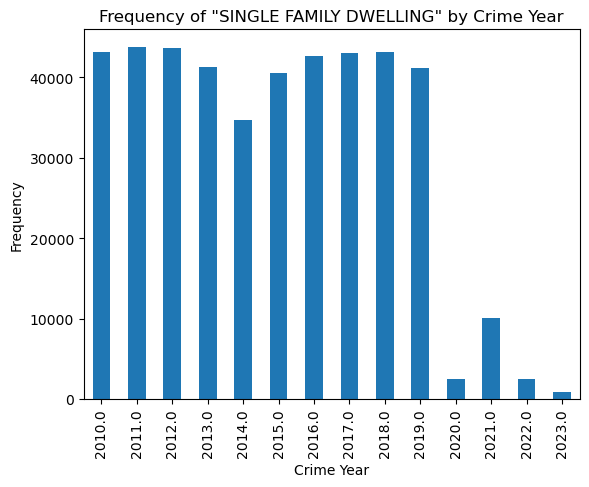

In [36]:
# Make a data frame with Columns for Average crime per area

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named "Data_complete"

# Use the groupby and value_counts methods to count occurrences of "SINGLE FAMILY DWELLING" by "Crime Year"
filtered_data = Data_complete[Data_complete['Premis Desc'] == 'SINGLE FAMILY DWELLING']
frequency_by_year = filtered_data.groupby('Crime Year').size()

# Plot the results as a bar chart
frequency_by_year.plot(kind='bar')
plt.xlabel('Crime Year')
plt.ylabel('Frequency')
plt.title('Frequency of "SINGLE FAMILY DWELLING" by Crime Year')
plt.show()
# Display Data Frame

In [ ]:
# Highest Crime Area(By Total Crimes)

In [ ]:
# Lowest Crime Area (By Total Crime)

In [ ]:
#Bar chart four areas, four years and total number of crimes

In [ ]:
# Identify Hot Spots
#Crime in each area acroos the years

In [27]:
# Any change in the Hot spots overs the years
print(Data_complete.columns)

Index(['DR Number', 'Area Name', 'Crime Code', 'Type of Crime', 'Victim Age',
       'Victim Gender', 'Victim Ethnicity', 'Scene of Crime', 'Latitude',
       'Longitude', 'Crime Location'],
      dtype='object')


### Female Vs Male Victims

In [ ]:
# Generate a pie plot showing the distribution of female versus male victims using Pandas
data = data["Sex"].value_counts()
plt.title("Female vs. Male Victims")
Female_male_data.plot.pie(autopct= "%1.1f%%")
plt.show()

### Victim Race 

# Child Abuse compare over the years

## Change in crime spot

In [ ]:
#Splitting race by groups: Black, White, Hispanics, Asians

In [ ]:
#Splitting premise into 4 categories: Commercial, residential, industrial and outdoors
# using Bins


In [ ]:
#Percentage of increase and decrease in crimes over the years
Total_crime_count groupbyyear (count)

In [ ]:
 #How has crime changed over the years?
 
 Line graphs 